In [1]:
import os, itertools
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from AutoML_Flow.MLEnv import *
from AutoML_Flow.Model_Training_and_Evaluation_Flow import modelTrainingFlow

/tmp/ipykernel_22305/776356912.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 實作範例 - Breast Cancer（Binary Classification）

In [2]:
rawData = load_breast_cancer(as_frame = True)["data"]
rawData = pd.concat([rawData, load_breast_cancer(as_frame = True)["target"]], axis = 1)
rawData = rawData.rename(
    columns = {
        i: i.replace(" ", "_") for i in rawData.columns
    }
)

In [3]:
allResult = list()
trainData, testData = train_test_split(rawData, test_size = 0.2, shuffle = True) 
trainData, valiData = train_test_split(trainData, test_size = 0.25, shuffle = True) 
for oneFE in featureEngineerFlow[:5]:

    totalResult = modelTrainingFlow(
        trainData = trainData,
        valiData = valiData,
        testData = testData,
        inputFeatures = trainData.drop(columns = ["target"]).columns.tolist(), 
        target = "target", 
        targetType = "classification",
        ml_methods = oneFE,
        hyperparameter_tuning_method = "default", 
        hyperparameter_tuning_epochs = 1, 
        HTMetric = "cross_entropy", 
        thresholdMetric = "f1_1", 
        featureSelection = oneFE["FeatureSelection"],
        modelNameList = [
            ["LightGBM"]
            # ["Random Forest with Entropy"],
            # ["LightGBM", "XGBoost", "Random Forest with Entropy"] * 10, 
        ], 
        fitBestModel = False,
        # metaLearner = "XGBoost", 
        # modelFilePath = "./", 
        importance_method = ["LIME"],
        importance_target = "trainData"
    )
    result = totalResult.fit()

    for one_parameters, one_metrics in zip(
        result["Evaluation"][0],
        result["Evaluation"][1]
    ):
        one_metrics = {
            key: value
            for key, value in one_metrics.items() if not(type(value) == list)
        }
    allResult.append(result)

LightGBM Training
最佳 Threshold 0.24135092784756415
dict_keys(['Features', 'Model', 'ModelNames', 'Hyperparameter_Tuning', 'Params_Importance', 'Best_Thres', 'FeatureEngineering', 'MetaLearner', 'MetaLearnerFeatures'])


LIME_train:   0%|          | 1/341 [00:38<3:40:50, 38.97s/it]

[ 2.13432787e-05  1.99358765e-05  7.17828542e-05  2.87257266e-05
  1.19579138e-05  1.18131123e-05  1.04295144e-05  1.03143464e-05
  1.07429094e-05  1.01360664e-05  1.01362495e-05  1.08699154e-05
  1.07386133e-05  1.76587012e-05  1.14102698e-05  1.23123065e-05
  1.09857807e-05  1.11428532e-05  1.09812991e-05  1.13722546e-05
  2.09662533e-05  1.79592960e-05  6.60077417e-05 -5.23644462e-05
  1.10670655e-05  9.79077782e-06  1.04577409e-05  1.15976526e-05
  1.23723795e-05  1.11102351e-05  1.11681244e-05] 1
mean_radius                0.000021
mean_texture               0.000020
mean_perimeter             0.000072
mean_area                  0.000029
mean_smoothness            0.000012
mean_compactness           0.000012
mean_concavity             0.000010
mean_concave_points        0.000010
mean_symmetry              0.000011
mean_fractal_dimension     0.000010
radius_error               0.000010
texture_error              0.000011
perimeter_error            0.000011
area_error               

LIME_train:   1%|          | 2/341 [00:39<1:33:30, 16.55s/it]

[-0.33888738  0.64027937 -0.2432466  -1.91429544  1.36031972 -0.15235913
 -0.08124044 -0.02831862  0.06160769  0.28914484  1.35599534  1.45549131
 -0.51185992 -0.60579351  0.32872934  0.7815536   0.52195503  0.81537518
  0.46026364  1.60440663  0.88880889 -0.71909255  2.24067162 -1.91276937
 -1.23359343 -0.23750922  0.99338938 -0.29582654 -0.30151021  0.09935983
  0.20916158] 1
mean_radius               -0.338887
mean_texture               0.640279
mean_perimeter            -0.243247
mean_area                 -1.914295
mean_smoothness            1.360320
mean_compactness          -0.152359
mean_concavity            -0.081240
mean_concave_points       -0.028319
mean_symmetry              0.061608
mean_fractal_dimension     0.289145
radius_error               1.355995
texture_error              1.455491
perimeter_error           -0.511860
area_error                -0.605794
smoothness_error           0.328729
compactness_error          0.781554
concavity_error            0.521955
concave

LIME_train:   1%|          | 3/341 [00:40<52:47,  9.37s/it]  

[ 1.32489561  0.8140301  -0.11592043  0.04565627  0.48907338  0.16448501
  1.75470827 -1.46572614  0.53515645  0.06056388  0.29454975 -1.03587676
  1.42271266 -0.04318571  0.3958123  -0.5737039   1.22761114  0.1126222
 -0.56140776 -0.35501209  0.42492801  0.14152655 -0.94390647 -0.64859681
  0.44187664  1.13040074 -0.25114311  0.36924057 -0.95158426  0.24539822
 -0.56273107] 0
mean_radius                1.324896
mean_texture               0.814030
mean_perimeter            -0.115920
mean_area                  0.045656
mean_smoothness            0.489073
mean_compactness           0.164485
mean_concavity             1.754708
mean_concave_points       -1.465726
mean_symmetry              0.535156
mean_fractal_dimension     0.060564
radius_error               0.294550
texture_error             -1.035877
perimeter_error            1.422713
area_error                -0.043186
smoothness_error           0.395812
compactness_error         -0.573704
concavity_error            1.227611
concave_

LIME_train:   1%|          | 4/341 [00:41<33:59,  6.05s/it]

[ 2.07094629  1.70479973  0.86983036  1.77272102  0.51354729  0.81284373
  0.94280992 -0.09387166  1.3639418   0.51675044 -0.88755943 -1.4625437
  0.06703258  1.18385572  0.45318906  0.62341265  0.84406714  1.01128697
 -0.23284046 -0.25593259 -1.29907673 -0.42530184  0.68226829  0.46143636
  2.334224   -1.0289117  -1.14971933 -0.42443874  0.71517038 -0.94704897
  1.73019684] 0
mean_radius                2.070946
mean_texture               1.704800
mean_perimeter             0.869830
mean_area                  1.772721
mean_smoothness            0.513547
mean_compactness           0.812844
mean_concavity             0.942810
mean_concave_points       -0.093872
mean_symmetry              1.363942
mean_fractal_dimension     0.516750
radius_error              -0.887559
texture_error             -1.462544
perimeter_error            0.067033
area_error                 1.183856
smoothness_error           0.453189
compactness_error          0.623413
concavity_error            0.844067
concave_

LIME_train:   1%|▏         | 5/341 [01:00<1:00:16, 10.76s/it]

[ 2.37443425e-05  2.27913398e-05  7.67571702e-05  7.78226261e-05
  1.23233338e-05  1.17536876e-05  1.10232514e-05  1.19814492e-05
  1.12214036e-05  1.09644692e-05  1.12470999e-05  1.21669237e-05
  1.40670322e-05  2.71925332e-05  1.17977868e-05  1.21564598e-05
  1.23569516e-05  1.30344956e-05  1.15252541e-05  1.15420272e-05
  2.56115849e-05  2.48705926e-05  8.53063478e-05 -8.93123842e-05
  1.03967769e-05  1.16225189e-05  1.23785362e-05  1.11615853e-05
  1.15366060e-05  1.34821492e-05  1.25852473e-05] 1
mean_radius                0.000024
mean_texture               0.000023
mean_perimeter             0.000077
mean_area                  0.000078
mean_smoothness            0.000012
mean_compactness           0.000012
mean_concavity             0.000011
mean_concave_points        0.000012
mean_symmetry              0.000011
mean_fractal_dimension     0.000011
radius_error               0.000011
texture_error              0.000012
perimeter_error            0.000014
area_error               

LIME_train:   2%|▏         | 6/341 [01:26<1:28:27, 15.84s/it]

[ 1.79616884e-05  2.01867056e-05  5.64764065e-05  3.83104748e-05
  1.04480890e-05  9.95416656e-06  1.06580416e-05  8.74171719e-06
  9.99446626e-06  9.97990052e-06  1.10619476e-05  1.09296897e-05
  1.08867745e-05  2.37501310e-05  1.07608396e-05  9.42029848e-06
  1.00183412e-05  8.90663166e-06  9.95708173e-06  9.47069081e-06
  1.97990217e-05  2.35689043e-05  4.90706261e-05 -5.53057618e-05
  9.03641062e-06  1.01502219e-05  9.24997409e-06  9.79421919e-06
  1.04964639e-05  8.71895859e-06  1.02662167e-05] 1
mean_radius                0.000018
mean_texture               0.000020
mean_perimeter             0.000056
mean_area                  0.000038
mean_smoothness            0.000010
mean_compactness           0.000010
mean_concavity             0.000011
mean_concave_points        0.000009
mean_symmetry              0.000010
mean_fractal_dimension     0.000010
radius_error               0.000011
texture_error              0.000011
perimeter_error            0.000011
area_error               

LIME_train:   2%|▏         | 7/341 [01:35<1:15:00, 13.47s/it]

[ 1.60927869e-05  1.40698613e-05 -1.25286519e-05  5.01854064e-05
  4.94348304e-05  3.75991708e-06  1.88664866e-05 -2.27614185e-06
  7.48867687e-05 -7.15201394e-07  3.02165766e-05  3.04495492e-05
  3.01612591e-05  2.33782844e-05  2.84780590e-05 -1.03390072e-05
  5.05263447e-05  3.20156556e-05 -1.87019202e-05  5.54106719e-05
 -3.33064713e-06  7.79315443e-06  1.50486439e-05 -5.33331556e-05
 -1.72157056e-05 -4.01602305e-05  5.19222275e-05 -5.71604982e-07
  1.25730749e-06  2.90652212e-05  1.02700474e-05] 1
mean_radius                1.609279e-05
mean_texture               1.406986e-05
mean_perimeter            -1.252865e-05
mean_area                  5.018541e-05
mean_smoothness            4.943483e-05
mean_compactness           3.759917e-06
mean_concavity             1.886649e-05
mean_concave_points       -2.276142e-06
mean_symmetry              7.488677e-05
mean_fractal_dimension    -7.152014e-07
radius_error               3.021658e-05
texture_error              3.044955e-05
perimeter_err

LIME_train:   2%|▏         | 8/341 [01:48<1:15:00, 13.52s/it]

[ 1.53217164e-05  1.86171648e-05  6.25743439e-05  1.83165884e-05
  8.68171451e-06  8.05550295e-06  9.21726791e-06  9.14968040e-06
  8.59980222e-06  9.31379406e-06  8.98109084e-06  9.49968284e-06
  9.33957296e-06  2.67200512e-05  7.36851249e-06  8.64647122e-06
  8.11040176e-06  8.88545180e-06  7.62785406e-06  8.78825506e-06
  1.63803810e-05  1.40193344e-05 -4.04932531e-05 -2.57941652e-05
  7.75622541e-06  7.79321762e-06  9.44535176e-06  8.11790035e-06
  7.91806891e-06  6.77596982e-06  7.68914189e-06] 1
mean_radius                0.000015
mean_texture               0.000019
mean_perimeter             0.000063
mean_area                  0.000018
mean_smoothness            0.000009
mean_compactness           0.000008
mean_concavity             0.000009
mean_concave_points        0.000009
mean_symmetry              0.000009
mean_fractal_dimension     0.000009
radius_error               0.000009
texture_error              0.000009
perimeter_error            0.000009
area_error               

LIME_train:   3%|▎         | 9/341 [02:14<1:36:02, 17.36s/it]

[ 1.45199423e-05  2.81862377e-06  6.36787112e-05  9.38972051e-05
  9.39194450e-06  1.05955058e-05  9.67780293e-06  9.82328498e-06
  1.07884887e-05  1.29091152e-05  9.08899324e-06  1.35889527e-05
  1.10340153e-05  3.69978688e-06  9.04534507e-06  5.98635397e-06
  1.40134041e-05  6.84151582e-06  1.00213947e-05  8.62909413e-06
  2.18268709e-05 -3.40770639e-05 -2.63520276e-04 -4.04602595e-05
  1.05298594e-05  1.44816333e-05  9.67835039e-06  9.05037460e-06
  4.72544793e-06  8.45376495e-06  7.98086807e-06] 1
mean_radius                0.000015
mean_texture               0.000003
mean_perimeter             0.000064
mean_area                  0.000094
mean_smoothness            0.000009
mean_compactness           0.000011
mean_concavity             0.000010
mean_concave_points        0.000010
mean_symmetry              0.000011
mean_fractal_dimension     0.000013
radius_error               0.000009
texture_error              0.000014
perimeter_error            0.000011
area_error               

LIME_train:   3%|▎         | 10/341 [02:23<1:22:12, 14.90s/it]

[ 4.45566808e-05  3.34492953e-05  1.27968722e-04  2.65590150e-04
  1.59469495e-05  7.96374973e-06 -7.33824698e-06  3.03578949e-05
  1.59263977e-05  2.20373225e-05  1.58551859e-05  3.78591285e-05
  2.85467899e-05  1.19094284e-04 -6.64402299e-06 -1.05939152e-05
  1.17647323e-05  2.59771820e-05 -3.39201743e-06  3.68176602e-05
 -1.59539211e-06  3.72922470e-05 -2.61367464e-03  3.25293518e-04
  1.84677120e-05  3.81168088e-05  2.66277690e-06  1.70725994e-05
  1.01466247e-05  4.97243126e-05  3.05401044e-05] 1
mean_radius                0.000045
mean_texture               0.000033
mean_perimeter             0.000128
mean_area                  0.000266
mean_smoothness            0.000016
mean_compactness           0.000008
mean_concavity            -0.000007
mean_concave_points        0.000030
mean_symmetry              0.000016
mean_fractal_dimension     0.000022
radius_error               0.000016
texture_error              0.000038
perimeter_error            0.000029
area_error               

LIME_train:   3%|▎         | 11/341 [02:38<1:21:03, 14.74s/it]

[ 2.68813800e-05  2.69525417e-05  9.15651682e-05  5.52795519e-05
  1.29972609e-05  4.67311172e-06  1.49769580e-05  1.27919699e-05
 -8.61511731e-07  9.96323051e-07  9.07893134e-06  3.28470286e-06
  1.83529399e-05 -2.87457288e-04 -8.28331913e-06 -1.92160481e-06
  1.16663205e-05  5.40666703e-06  9.51287462e-06  2.94850157e-06
  1.98163627e-05  3.53728616e-05 -4.07866916e-04  2.44510203e-05
  2.81645645e-05  7.52132149e-06  2.30811984e-06  9.50376482e-06
  3.90086586e-06  6.23229004e-07  1.00375194e-05] 1
mean_radius                2.688138e-05
mean_texture               2.695254e-05
mean_perimeter             9.156517e-05
mean_area                  5.527955e-05
mean_smoothness            1.299726e-05
mean_compactness           4.673112e-06
mean_concavity             1.497696e-05
mean_concave_points        1.279197e-05
mean_symmetry             -8.615117e-07
mean_fractal_dimension     9.963231e-07
radius_error               9.078931e-06
texture_error              3.284703e-06
perimeter_err

LIME_train:   4%|▎         | 12/341 [02:38<57:31, 10.49s/it]  

[ 0.69761969  1.51049582 -0.91710072 -1.08840429 -0.98206103  1.00406017
  0.66135696  0.80081671  0.67645494 -0.51974174 -0.23911339 -0.21773709
 -2.24191218  0.23302764 -1.05564904  0.36951194  0.91193178 -0.89004582
 -0.10505532  1.04598801  0.59939123  2.22875073  0.59606292 -1.67094886
  0.05847048 -0.65600545 -1.24802389 -0.12233143 -1.03663643  0.84848257
  0.10717167] 0
mean_radius                0.697620
mean_texture               1.510496
mean_perimeter            -0.917101
mean_area                 -1.088404
mean_smoothness           -0.982061
mean_compactness           1.004060
mean_concavity             0.661357
mean_concave_points        0.800817
mean_symmetry              0.676455
mean_fractal_dimension    -0.519742
radius_error              -0.239113
texture_error             -0.217737
perimeter_error           -2.241912
area_error                 0.233028
smoothness_error          -1.055649
compactness_error          0.369512
concavity_error            0.911932
concave

LIME_train:   4%|▍         | 13/341 [02:39<41:31,  7.59s/it]

[-0.82746736 -0.4871307   0.21600839 -1.16060484 -0.35695303 -1.42684791
 -1.32991672  1.36081758  0.19202738  2.19493003 -2.11305029  1.73026401
 -1.41919184 -0.13074327 -1.04054344 -0.48063926 -1.58263176 -0.33249813
  1.19623358  1.52775223  1.34353017 -1.42895939  1.09756046  1.13857845
  1.49506378 -0.78620742 -0.83333816  0.11117133  0.72108445  0.5453618
 -0.11648462] 0
mean_radius               -0.827467
mean_texture              -0.487131
mean_perimeter             0.216008
mean_area                 -1.160605
mean_smoothness           -0.356953
mean_compactness          -1.426848
mean_concavity            -1.329917
mean_concave_points        1.360818
mean_symmetry              0.192027
mean_fractal_dimension     2.194930
radius_error              -2.113050
texture_error              1.730264
perimeter_error           -1.419192
area_error                -0.130743
smoothness_error          -1.040543
compactness_error         -0.480639
concavity_error           -1.582632
concave_

LIME_train:   4%|▍         | 14/341 [03:12<1:23:15, 15.28s/it]

[ 1.54811556e-05  1.02027351e-05  8.80270411e-05  5.99280619e-05
  3.48527159e-06  9.40532427e-06  1.75231304e-06  1.02090618e-05
  8.51050086e-06  1.94688269e-06  7.22794981e-07  1.06349315e-05
  1.71237575e-05  2.85598492e-05  4.28250799e-06  7.81127751e-06
  1.02747759e-05  8.54817356e-06  1.09584728e-06  1.01616845e-05
  1.19623279e-05 -2.70995641e-04 -4.32725711e-04  3.30080902e-05
  8.11878114e-06  6.62074784e-06  8.91446305e-06  1.05417852e-05
  7.62988448e-06  5.07696276e-06  2.68534487e-06] 1
mean_radius                1.548116e-05
mean_texture               1.020274e-05
mean_perimeter             8.802704e-05
mean_area                  5.992806e-05
mean_smoothness            3.485272e-06
mean_compactness           9.405324e-06
mean_concavity             1.752313e-06
mean_concave_points        1.020906e-05
mean_symmetry              8.510501e-06
mean_fractal_dimension     1.946883e-06
radius_error               7.227950e-07
texture_error              1.063493e-05
perimeter_err

LIME_train:   4%|▍         | 15/341 [03:22<1:14:16, 13.67s/it]

[ 2.31604738e-05  4.83234808e-05  1.40820837e-04  2.01798285e-04
  2.03633473e-05  2.34886897e-05 -5.31152689e-06  1.50878057e-05
  1.41083860e-05  1.17133370e-05  1.36199107e-05  2.13514495e-05
  3.08552508e-05  1.32778639e-04  1.93846180e-05  1.37467597e-05
  4.48731372e-06  1.10053104e-05  3.58769867e-05  2.06982732e-05
  4.81115853e-05  3.17474697e-05 -2.03948511e-03  2.39271987e-04
 -1.21941303e-05  2.53011415e-06  1.05297954e-05  7.72510504e-06
  7.73613859e-06  1.61452282e-05  9.18277737e-06] 1
mean_radius                0.000023
mean_texture               0.000048
mean_perimeter             0.000141
mean_area                  0.000202
mean_smoothness            0.000020
mean_compactness           0.000023
mean_concavity            -0.000005
mean_concave_points        0.000015
mean_symmetry              0.000014
mean_fractal_dimension     0.000012
radius_error               0.000014
texture_error              0.000021
perimeter_error            0.000031
area_error               

LIME_train:   5%|▍         | 16/341 [03:31<1:05:22, 12.07s/it]

[ 1.31992691e-05  1.64662213e-05  9.64767716e-05  2.79169440e-05
  7.17037146e-06  7.10610867e-06  6.42263504e-06  6.95073617e-06
  7.88552361e-06  8.72234447e-06  7.44953763e-06  7.36430844e-06
  8.76228112e-06  4.73735609e-06  7.28692708e-06  7.64807075e-06
  8.58028288e-06  8.58190130e-06  7.34825322e-06  7.83328954e-06
  1.52370528e-05  1.96614063e-05 -1.27848817e-05 -4.05157107e-05
  8.77351336e-06  8.57040032e-06  8.05648913e-06  9.69073010e-06
  9.26174097e-06  9.04546989e-06  9.57248911e-06] 1
mean_radius                0.000013
mean_texture               0.000016
mean_perimeter             0.000096
mean_area                  0.000028
mean_smoothness            0.000007
mean_compactness           0.000007
mean_concavity             0.000006
mean_concave_points        0.000007
mean_symmetry              0.000008
mean_fractal_dimension     0.000009
radius_error               0.000007
texture_error              0.000007
perimeter_error            0.000009
area_error               

LIME_train:   5%|▍         | 17/341 [03:40<59:52, 11.09s/it]  

[ 6.25211815e-06  2.89607536e-05  5.83884076e-05  5.33178689e-05
  5.90795333e-06  1.89919236e-05 -5.17678449e-06  1.89932182e-05
  7.31989958e-06  9.21034082e-06  2.91581292e-06 -3.47244344e-06
  2.87696113e-06  2.31572241e-05  9.72248099e-06  6.69400668e-06
  1.48848063e-06  6.28297447e-06 -7.80299693e-06  3.68724181e-06
  1.02837807e-05  2.84928129e-05  4.46815350e-05 -6.44152974e-05
  5.88299304e-06  8.98958355e-06  5.20170656e-06  1.67536759e-05
  2.08950691e-05 -5.78074833e-06 -2.01605718e-06] 1
mean_radius                0.000006
mean_texture               0.000029
mean_perimeter             0.000058
mean_area                  0.000053
mean_smoothness            0.000006
mean_compactness           0.000019
mean_concavity            -0.000005
mean_concave_points        0.000019
mean_symmetry              0.000007
mean_fractal_dimension     0.000009
radius_error               0.000003
texture_error             -0.000003
perimeter_error            0.000003
area_error               

LIME_train:   5%|▌         | 18/341 [03:41<43:17,  8.04s/it]

[-0.28190477 -0.34591403  0.02043561  1.16276883 -1.8530914  -0.25291972
  0.14183525  1.86197538 -0.04252354  0.71777783 -1.76205248  1.24798895
  0.19832356 -1.26715624  0.53504751 -0.36391491 -2.16078309 -0.84387528
 -0.2573268  -0.66949841  2.04329044  1.7640355   1.03811831  0.46013218
 -0.87536625  0.02932117  0.53317264 -0.02124045  0.01775747 -0.24894909
 -2.07456389] 0
mean_radius               -0.281905
mean_texture              -0.345914
mean_perimeter             0.020436
mean_area                  1.162769
mean_smoothness           -1.853091
mean_compactness          -0.252920
mean_concavity             0.141835
mean_concave_points        1.861975
mean_symmetry             -0.042524
mean_fractal_dimension     0.717778
radius_error              -1.762052
texture_error              1.247989
perimeter_error            0.198324
area_error                -1.267156
smoothness_error           0.535048
compactness_error         -0.363915
concavity_error           -2.160783
concave

LIME_train:   6%|▌         | 19/341 [03:41<31:27,  5.86s/it]

[ 0.902492   -1.87516969  0.37963477 -1.28248857 -1.47089367  0.60323761
 -0.45700984  2.34382992 -0.42269764  0.73018965  0.64537766  0.53496497
  1.29911379  0.67395182  0.60933171  0.11462061 -0.55943157 -0.02523353
  0.93317245  1.08177585  1.42193566  0.91492854 -0.32550709 -0.31480862
  0.60656874 -1.03803323 -1.34013995 -0.19485037  0.53378873 -0.44730181
 -1.08825438] 0
mean_radius                0.902492
mean_texture              -1.875170
mean_perimeter             0.379635
mean_area                 -1.282489
mean_smoothness           -1.470894
mean_compactness           0.603238
mean_concavity            -0.457010
mean_concave_points        2.343830
mean_symmetry             -0.422698
mean_fractal_dimension     0.730190
radius_error               0.645378
texture_error              0.534965
perimeter_error            1.299114
area_error                 0.673952
smoothness_error           0.609332
compactness_error          0.114621
concavity_error           -0.559432
concave

LIME_train:   6%|▌         | 20/341 [03:42<23:08,  4.33s/it]

[ 0.38975695 -1.72095655  1.36130793 -0.06396027 -1.1506217   1.24819131
 -1.06554893 -2.76476398  0.17949841  0.04346541 -0.2744869  -0.89031199
  0.52686843 -0.07580768  1.31735685  0.98671859  1.13401433  0.04857186
 -0.68382943  0.17090414 -0.22347381 -1.5246131  -1.99846801 -1.29346449
 -1.40447262 -1.12645064 -0.74722537 -1.25600474  1.0159933   0.32555943
 -1.70176345] 0
mean_radius                0.389757
mean_texture              -1.720957
mean_perimeter             1.361308
mean_area                 -0.063960
mean_smoothness           -1.150622
mean_compactness           1.248191
mean_concavity            -1.065549
mean_concave_points       -2.764764
mean_symmetry              0.179498
mean_fractal_dimension     0.043465
radius_error              -0.274487
texture_error             -0.890312
perimeter_error            0.526868
area_error                -0.075808
smoothness_error           1.317357
compactness_error          0.986719
concavity_error            1.134014
concave

LIME_train:   6%|▌         | 21/341 [03:43<17:22,  3.26s/it]

[ 0.38664958 -0.25203707 -0.704651    0.62445214  0.77268138 -0.45414928
 -0.51521144  0.62513266 -0.73750767 -0.02986948  0.16043998 -0.15244819
  0.58622923 -1.77925044  1.26551855 -1.08582886  0.7621718   0.26180678
  0.11145545  1.51809877  0.49147738 -1.07701244 -1.69700961 -0.41316118
  1.25679997 -0.654977    1.33080557 -0.12118682 -1.48925471  1.51487914
  2.53837684] 1
mean_radius                0.386650
mean_texture              -0.252037
mean_perimeter            -0.704651
mean_area                  0.624452
mean_smoothness            0.772681
mean_compactness          -0.454149
mean_concavity            -0.515211
mean_concave_points        0.625133
mean_symmetry             -0.737508
mean_fractal_dimension    -0.029869
radius_error               0.160440
texture_error             -0.152448
perimeter_error            0.586229
area_error                -1.779250
smoothness_error           1.265519
compactness_error         -1.085829
concavity_error            0.762172
concave

LIME_train:   6%|▋         | 22/341 [03:52<26:12,  4.93s/it]

[ 2.47815327e-05  1.08839859e-05  1.45875904e-05  2.89368721e-05
  1.69314081e-05 -6.10587911e-06  2.11239161e-05  6.08400120e-06
  4.58671858e-05  5.10109268e-05 -9.29289756e-06  5.95281464e-05
  1.38574954e-05  1.52368419e-05 -5.19175062e-06  6.24076371e-05
  5.43742813e-05  1.01955376e-05 -1.41541465e-05  3.65405581e-05
  2.33166248e-05 -1.43833099e-05  2.68928452e-05 -4.10583125e-05
 -2.31210061e-05 -1.19698057e-05 -5.53402221e-06  2.59126202e-05
  3.43884866e-05 -3.08401552e-05 -5.77155993e-06] 1
mean_radius                0.000025
mean_texture               0.000011
mean_perimeter             0.000015
mean_area                  0.000029
mean_smoothness            0.000017
mean_compactness          -0.000006
mean_concavity             0.000021
mean_concave_points        0.000006
mean_symmetry              0.000046
mean_fractal_dimension     0.000051
radius_error              -0.000009
texture_error              0.000060
perimeter_error            0.000014
area_error               

LIME_train:   7%|▋         | 23/341 [03:53<19:51,  3.75s/it]

[ 0.24533954  0.71970219  0.27764446  0.37053119  0.80447429 -0.01952414
  0.53889793  0.5577067  -1.58363245 -0.51924106  0.86272816  0.9649871
 -0.60387481 -1.12468703 -0.02451307 -0.5834492   1.78478615 -1.04082366
  0.11074238 -0.3742838  -0.04076906  0.10675799 -0.0667735   1.90208301
  0.10787086 -1.51930255 -1.36451199 -1.30709929  0.48494167  0.20492996
 -0.2752586 ] 0
mean_radius                0.245340
mean_texture               0.719702
mean_perimeter             0.277644
mean_area                  0.370531
mean_smoothness            0.804474
mean_compactness          -0.019524
mean_concavity             0.538898
mean_concave_points        0.557707
mean_symmetry             -1.583632
mean_fractal_dimension    -0.519241
radius_error               0.862728
texture_error              0.964987
perimeter_error           -0.603875
area_error                -1.124687
smoothness_error          -0.024513
compactness_error         -0.583449
concavity_error            1.784786
concave_

LIME_train:   7%|▋         | 24/341 [03:54<15:19,  2.90s/it]

[-0.36228209 -1.79074977  0.13684152  0.30451571  0.91737782 -2.50796867
 -0.18613143 -0.40448308  0.69032918 -0.59331688 -0.83501964 -1.25274364
 -0.02069932  2.42935658 -0.86703457 -1.07758     0.79024899  0.42751755
  0.13585405 -0.97084344 -1.00040916  0.95176458  1.77839118  1.66967273
  0.98873753  0.92651277  1.03829776 -0.19008468  0.84858367 -2.97291423
 -0.89465408] 0
mean_radius               -0.362282
mean_texture              -1.790750
mean_perimeter             0.136842
mean_area                  0.304516
mean_smoothness            0.917378
mean_compactness          -2.507969
mean_concavity            -0.186131
mean_concave_points       -0.404483
mean_symmetry              0.690329
mean_fractal_dimension    -0.593317
radius_error              -0.835020
texture_error             -1.252744
perimeter_error           -0.020699
area_error                 2.429357
smoothness_error          -0.867035
compactness_error         -1.077580
concavity_error            0.790249
concave

LIME_train:   7%|▋         | 25/341 [04:16<46:40,  8.86s/it]

[ 1.68672617e-05  1.73659608e-05  5.27118088e-05  1.60831482e-05
  8.29741337e-06  9.24773422e-06  9.32254190e-06  9.29452863e-06
  9.81565413e-06  8.23873470e-06  8.36470999e-06  9.24808539e-06
  1.02172871e-05  1.93748024e-05  9.25153486e-06  8.23036988e-06
  8.73428881e-06  9.16985651e-06  9.95249798e-06  9.71935898e-06
  1.58626375e-05  2.09045132e-05  3.81211451e-05 -3.62147168e-05
  8.01391312e-06  8.43453832e-06  9.00920523e-06  8.67144856e-06
  9.01563369e-06  8.55890767e-06  9.65917691e-06] 1
mean_radius                0.000017
mean_texture               0.000017
mean_perimeter             0.000053
mean_area                  0.000016
mean_smoothness            0.000008
mean_compactness           0.000009
mean_concavity             0.000009
mean_concave_points        0.000009
mean_symmetry              0.000010
mean_fractal_dimension     0.000008
radius_error               0.000008
texture_error              0.000009
perimeter_error            0.000010
area_error               

LIME_train:   8%|▊         | 26/341 [04:17<33:46,  6.43s/it]

[-0.83832489  1.03895499  0.1666563  -1.35729207  0.53142924 -0.99864526
 -0.34639994 -0.41786502  0.44084648  1.78771815 -1.3483096  -0.50544137
 -1.22345194 -0.53213161  0.53696452 -0.79819086  0.47237116  0.29639796
 -0.86918161  0.83060379  0.64688378  1.32584941 -1.14250279 -1.03164305
  0.33756944 -1.78699755  0.13144054  0.97238815  1.31613888 -0.24205596
  0.57454704] 0
mean_radius               -0.838325
mean_texture               1.038955
mean_perimeter             0.166656
mean_area                 -1.357292
mean_smoothness            0.531429
mean_compactness          -0.998645
mean_concavity            -0.346400
mean_concave_points       -0.417865
mean_symmetry              0.440846
mean_fractal_dimension     1.787718
radius_error              -1.348310
texture_error             -0.505441
perimeter_error           -1.223452
area_error                -0.532132
smoothness_error           0.536965
compactness_error         -0.798191
concavity_error            0.472371
concave

LIME_train:   8%|▊         | 27/341 [04:44<1:06:33, 12.72s/it]

[ 1.43443185e-05  1.76712584e-05  5.04652174e-05  4.27138144e-05
  7.99312109e-06  7.13033598e-06  8.37995426e-06  8.82130211e-06
  7.84856124e-06  7.53798050e-06  6.57351209e-06  8.23938907e-06
  9.41110338e-06  2.28950513e-05  7.00427934e-06  6.60348385e-06
  7.56459461e-06  7.71255652e-06  9.96308194e-06  8.47571286e-06
  1.29157082e-05  1.95739041e-05 -2.53859244e-04  3.44095565e-06
  6.60586956e-06  8.95824785e-06  7.11053181e-06  9.10344941e-06
  7.89656558e-06  9.23770742e-06  9.45434738e-06] 1
mean_radius                0.000014
mean_texture               0.000018
mean_perimeter             0.000050
mean_area                  0.000043
mean_smoothness            0.000008
mean_compactness           0.000007
mean_concavity             0.000008
mean_concave_points        0.000009
mean_symmetry              0.000008
mean_fractal_dimension     0.000008
radius_error               0.000007
texture_error              0.000008
perimeter_error            0.000009
area_error               

LIME_train:   8%|▊         | 28/341 [04:53<59:41, 11.44s/it]  

[ 1.76379517e-05  1.78379879e-05  5.35966885e-05  2.14262157e-05
  9.79311599e-06  9.60497896e-06  1.01241629e-05  8.84656608e-06
  9.20794600e-06  8.72736262e-06  1.00049616e-05  9.87439633e-06
  9.36950078e-06  1.57241371e-05  1.00649201e-05  9.61510171e-06
  9.39787095e-06  9.62705121e-06  9.12026521e-06  1.00012450e-05
  1.76749513e-05  1.98876211e-05  9.11322754e-06 -3.59697271e-05
  8.34082769e-06  9.35159771e-06  8.86794238e-06  9.58150810e-06
  9.44973981e-06  9.89314660e-06  1.01929855e-05] 1
mean_radius                0.000018
mean_texture               0.000018
mean_perimeter             0.000054
mean_area                  0.000021
mean_smoothness            0.000010
mean_compactness           0.000010
mean_concavity             0.000010
mean_concave_points        0.000009
mean_symmetry              0.000009
mean_fractal_dimension     0.000009
radius_error               0.000010
texture_error              0.000010
perimeter_error            0.000009
area_error               

LIME_train:   9%|▊         | 29/341 [04:54<43:03,  8.28s/it]

[-2.10779443  1.75136565 -0.62083965  0.78294383 -0.82719491 -1.21605123
  0.42852346 -0.45304945  0.00856132  0.47368793  1.18475712 -0.28388358
  0.19173705 -0.33267675 -1.68866364 -0.42234299 -0.28946761  0.04192001
 -1.0310821   0.17755995 -0.58337256 -0.06581665 -0.54284523  0.01662202
 -0.22373314  0.92921174  1.20838199  0.56513901 -1.33879929 -0.23340187
 -0.21372521] 0
mean_radius               -2.107794
mean_texture               1.751366
mean_perimeter            -0.620840
mean_area                  0.782944
mean_smoothness           -0.827195
mean_compactness          -1.216051
mean_concavity             0.428523
mean_concave_points       -0.453049
mean_symmetry              0.008561
mean_fractal_dimension     0.473688
radius_error               1.184757
texture_error             -0.283884
perimeter_error            0.191737
area_error                -0.332677
smoothness_error          -1.688664
compactness_error         -0.422343
concavity_error           -0.289468
concave

LIME_train:   9%|▉         | 30/341 [04:55<31:31,  6.08s/it]

[-1.668502    0.03807711  1.48991597  0.6648744   0.18073955  1.64184389
 -1.38051782  1.75291851 -1.24232695  1.31059645 -0.34455403  0.29663356
 -2.14551365 -0.27178417  0.5935568   1.11302968 -1.51108726 -1.2173989
  0.73038179  0.41645377 -0.50855722  0.417136    1.78620056  1.497711
 -1.44462467 -0.70573291 -0.25326416 -1.22076006 -0.87817366 -0.35053968
  1.10675281] 0
mean_radius               -1.668502
mean_texture               0.038077
mean_perimeter             1.489916
mean_area                  0.664874
mean_smoothness            0.180740
mean_compactness           1.641844
mean_concavity            -1.380518
mean_concave_points        1.752919
mean_symmetry             -1.242327
mean_fractal_dimension     1.310596
radius_error              -0.344554
texture_error              0.296634
perimeter_error           -2.145514
area_error                -0.271784
smoothness_error           0.593557
compactness_error          1.113030
concavity_error           -1.511087
concave_po

LIME_train:   9%|▉         | 31/341 [05:04<35:43,  6.92s/it]

[ 1.38506905e-05  1.72562126e-05  8.40321581e-05  3.16489203e-05
  7.67045290e-06  9.11487804e-06  7.06229219e-06  7.85676774e-06
  1.03027415e-05  9.34147626e-06  9.50914022e-06  8.31266115e-06
  9.28470008e-06  2.79254170e-05  8.66253910e-06  7.89628638e-06
  7.60693834e-06  7.91209122e-06  8.30279675e-06  7.52234176e-06
  1.61099242e-05  1.72469353e-05 -1.90712358e-04 -1.40433204e-05
  8.22795408e-06  8.26070279e-06  8.38027285e-06  9.19332449e-06
  9.35365958e-06  9.39065547e-06  8.60133943e-06] 1
mean_radius                0.000014
mean_texture               0.000017
mean_perimeter             0.000084
mean_area                  0.000032
mean_smoothness            0.000008
mean_compactness           0.000009
mean_concavity             0.000007
mean_concave_points        0.000008
mean_symmetry              0.000010
mean_fractal_dimension     0.000009
radius_error               0.000010
texture_error              0.000008
perimeter_error            0.000009
area_error               

LIME_train:   9%|▉         | 32/341 [05:05<26:17,  5.11s/it]

[ 0.31695086 -0.73255499 -1.62553955  0.1658041  -1.61336069  0.81526034
 -0.61938675  2.09171306  0.05088553  1.56881199 -0.40467662  1.82057178
 -1.42209839 -0.317169   -1.93884194  1.0321215   1.43655435  0.05545892
 -0.08947767  0.31994227  0.56621339 -0.05667175 -0.43145324  0.64844277
 -2.30293936 -1.87774528  0.01589421  1.62905903  0.08656136  0.92764075
  1.41141032] 0
mean_radius                0.316951
mean_texture              -0.732555
mean_perimeter            -1.625540
mean_area                  0.165804
mean_smoothness           -1.613361
mean_compactness           0.815260
mean_concavity            -0.619387
mean_concave_points        2.091713
mean_symmetry              0.050886
mean_fractal_dimension     1.568812
radius_error              -0.404677
texture_error              1.820572
perimeter_error           -1.422098
area_error                -0.317169
smoothness_error          -1.938842
compactness_error          1.032122
concavity_error            1.436554
concave

LIME_train:  10%|▉         | 33/341 [05:05<19:28,  3.79s/it]

[ 0.83970558 -0.83773312  0.08376118 -0.65224961 -0.52560047  0.24619804
  0.15972698 -1.06353515 -0.44664231  2.23979638 -0.68823703  1.1996799
  0.51220685  0.87248248 -1.53905496  0.58525907  0.15791458  1.15206245
  0.51156052  2.83752173  0.36075863 -1.85898327 -0.46344342  0.34240613
 -0.11083142 -2.6712879   0.26124443  0.36424235 -0.9443809  -1.17995101
  1.9690334 ] 0
mean_radius                0.839706
mean_texture              -0.837733
mean_perimeter             0.083761
mean_area                 -0.652250
mean_smoothness           -0.525600
mean_compactness           0.246198
mean_concavity             0.159727
mean_concave_points       -1.063535
mean_symmetry             -0.446642
mean_fractal_dimension     2.239796
radius_error              -0.688237
texture_error              1.199680
perimeter_error            0.512207
area_error                 0.872482
smoothness_error          -1.539055
compactness_error          0.585259
concavity_error            0.157915
concave_

LIME_train:  10%|▉         | 33/341 [05:07<47:45,  9.31s/it]


KeyboardInterrupt: 

In [6]:
pd.DataFrame.from_records(result["Evaluation"][0])

,Model,Meta-Learner,Features,FeatureSelection,Imbalanced,Decomposition,Standardization
0,LightGBM,None,"[mean_radius, mean_texture, mean_perimeter, me...",None,None,PCA,None
1,LightGBM,None,"[mean_radius, mean_texture, mean_perimeter, me...",None,None,PCA,None
2,LightGBM,None,"[mean_radius, mean_texture, mean_perimeter, me...",None,None,PCA,None


In [ ]:
pd.DataFrame(result["PermutationImportance"]["originalData"])

In [ ]:
pd.DataFrame(result["PermutationImportance"]["trainData"])

# 實作範例 - Iris Datasets（Multi-class Classification）

In [ ]:
rawData = load_iris(as_frame = True)["data"]
rawData = pd.concat([rawData, load_iris(as_frame = True)["target"]], axis = 1)
rawData = rawData.rename(
    columns = {
        "sepal length (cm)": "sepal_length_(cm)",
        "sepal width (cm)": "sepal_width_(cm)",
        "petal length (cm)": "petal_length_(cm)",
        "petal width (cm)": "'petal_width_(cm)"
    }
)
trainData, testData = train_test_split(rawData, test_size = 0.2, shuffle = True) 
trainData, valiData = train_test_split(trainData, test_size = 0.25, shuffle = True) 
trainData, valiData, testData = trainData.reset_index(drop = True), valiData.reset_index(drop = True), testData.reset_index(drop = True) 

## Feature Engineer and Model Training

In [ ]:
from AutoML_Flow.Model_Training_and_Evaluation_Flow import modelTrainingFlow 
for oneFE in featureEngineerFlow:
    totalResult = modelTrainingFlow(
        trainData = trainData,
        valiData = valiData,
        testData = testData,
        inputFeatures = trainData.drop(columns = ["target"]).columns.tolist(), 
        target = "target", 
        targetType = "classification",
        ml_methods = oneFE,
        HTMetric = "cross_entropy",
        thresholdMetric = "f1_1", 
        featureSelection = oneFE["FeatureSelection"],
        hyperparameter_tuning_method = "TPESampler", 
        hyperparameter_tuning_epochs = 1
    )
    result = totalResult.fit(permutationImportanceMethod = ["trainData", "originalData"])

In [ ]:
pd.DataFrame(result["Evaluation"])

In [ ]:
pd.DataFrame(result["PermutationImportance"]["originalData"])

In [ ]:
pd.DataFrame(result["PermutationImportance"]["trainData"])

# 實作範例 - Diabete Datasets

In [ ]:
rawData = load_diabetes(as_frame = True)["data"]
rawData = pd.concat([rawData, load_diabetes(as_frame = True)["target"]], axis = 1)
trainData, testData = train_test_split(rawData, test_size = 0.2, shuffle = True) 
trainData, valiData = train_test_split(trainData, test_size = 0.25, shuffle = True) 
trainData, valiData, testData = trainData.reset_index(drop = True), valiData.reset_index(drop = True), testData.reset_index(drop = True) 

## Feature Engineer and Model Training

In [ ]:
from AutoML_Flow.Model_Training_and_Evaluation_Flow import modelTrainingFlow 
for oneFE in featureEngineerFlow:
    modelTrainingFlow = modelTrainingFlow(
        trainData = trainData,
        valiData = valiData,
        testData = testData,
        inputFeatures = trainData.drop(columns = ["target"]).columns.tolist(), 
        target = "target", 
        ml_methods = oneFE,
        targetType = "regression",
        HTMetric = "RMSE", 
        hyperparameter_tuning_method = "TPESampler", 
        hyperparameter_tuning_epochs = 1, 
        featureSelection = oneFE["FeatureSelection"],
        importanceMethod = ["None"],
        modelNameList = [
            ["LightGBM", "CatBoost"]
        ]
    )
    totalResult = modelTrainingFlow.fit()
    break

In [ ]:
pd.DataFrame(totalResult["Evaluation"])

In [ ]:
pd.DataFrame(totalResult["Evaluation"])

# 不平衡資料處理範例

In [ ]:
import numpy as np
import pandas as pd
from imblearn.datasets import fetch_dataset
dataset = fetch_dataset()["thyroid_sick"]

# LIME Test

/tmp/ipykernel_14851/1207463455.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Accuracy: 100.00%


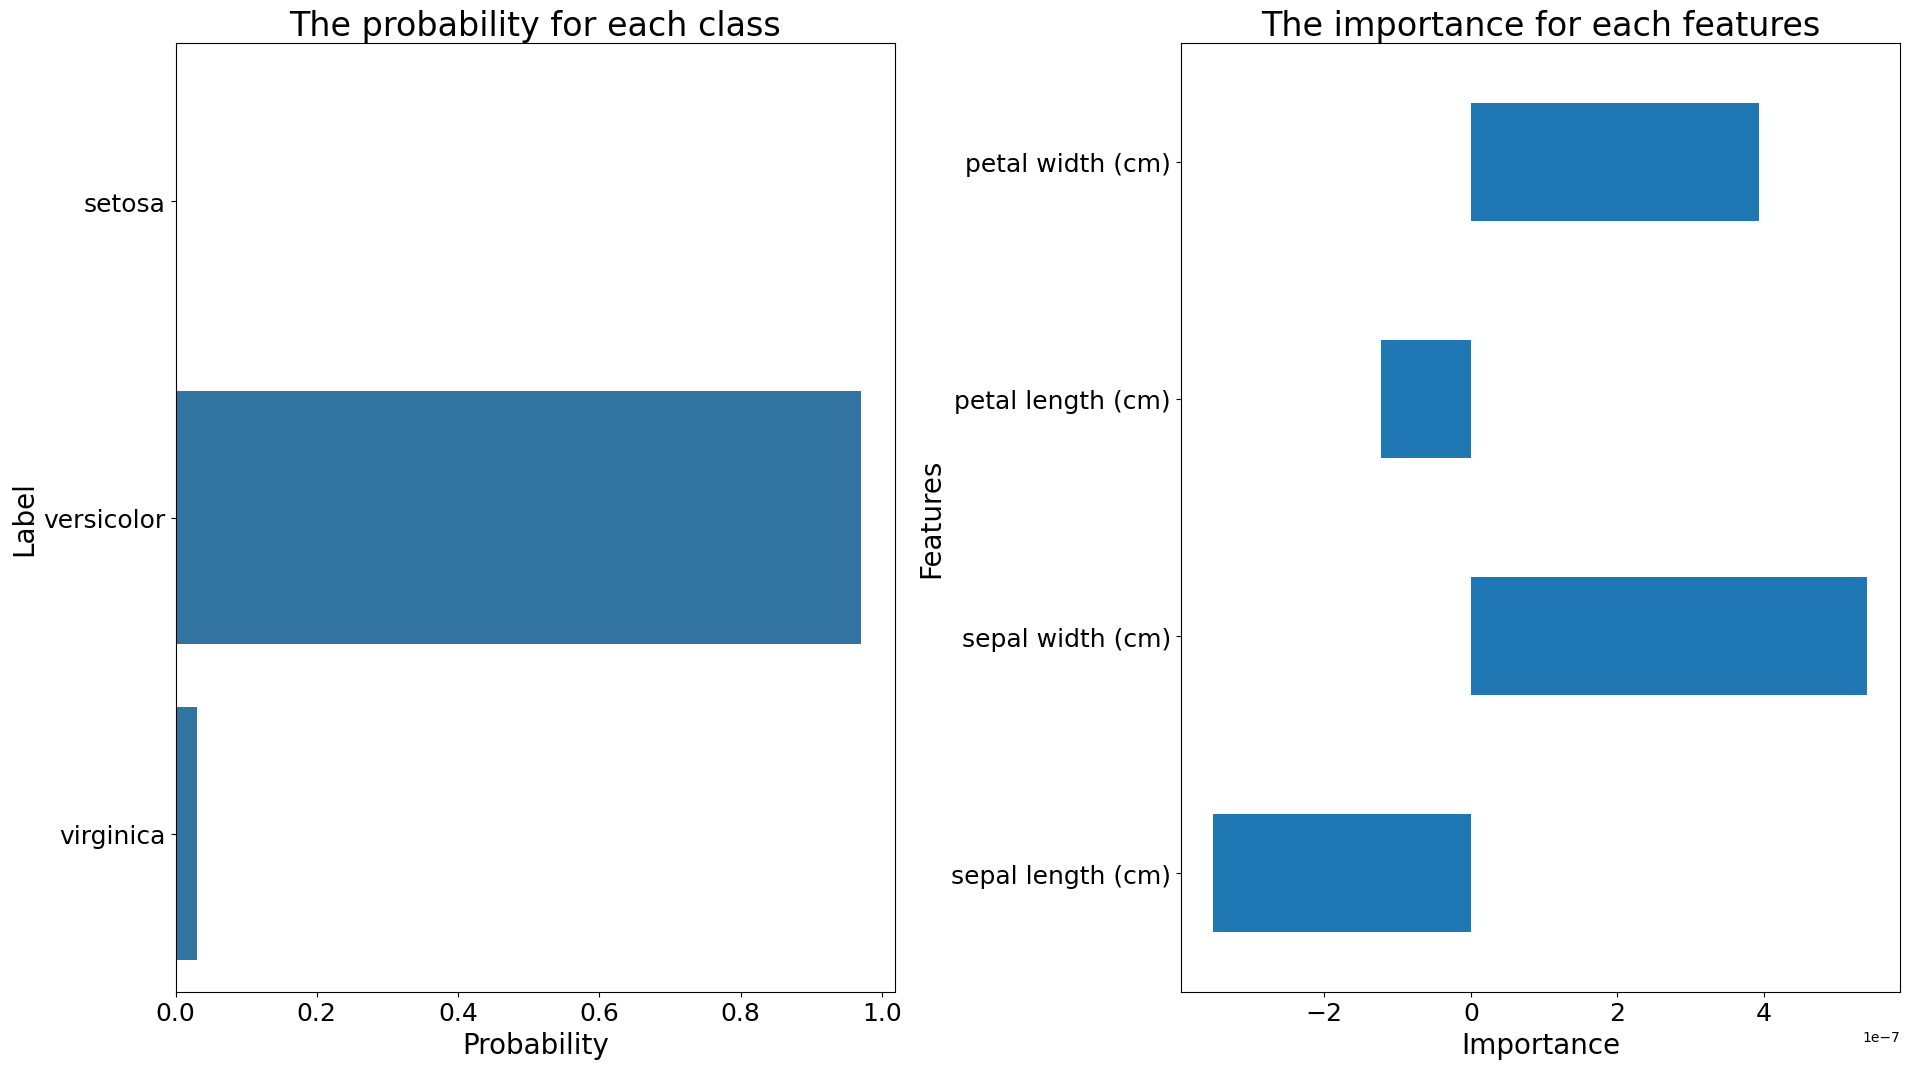

In [1]:
# 導入所需的庫
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from AutoML_Flow.tabular_LIME import tabular_LIME

# 加載鳶尾花資料集
iris = load_iris()
X = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
y = iris.target

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建隨機森林分類器
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
clf.fit(X_train, y_train)

# 進行預測
y_pred = clf.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

lime_obj = tabular_LIME(
    original_model  = [clf],
    target_label = iris.target_names,
    features_list = [iris.feature_names]
)
lime_obj.fit(
    explain_instance = pd.Series(X_test.iloc[0, :])
)
ax = lime_obj.draw_forest_plot()
plt.show()